### Recommendation System for E-commerce

In [8]:
!kaggle datasets download -d PromptCloudHQ/flipkart-products

Dataset URL: https://www.kaggle.com/datasets/PromptCloudHQ/flipkart-products
License(s): CC-BY-SA-4.0
100%|███████████████████████████████████████| 5.50M/5.50M [00:11<00:00, 679kB/s]
100%|███████████████████████████████████████| 5.50M/5.50M [00:11<00:00, 501kB/s]


In [9]:
! mkdir flipkart-products

In [10]:
! unzip flipkart-products.zip -d flipkart-products

Archive:  flipkart-products.zip
  inflating: flipkart-products/flipkart_com-ecommerce_sample.csv  


In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
df=pd.read_csv("/home/rewood/Desktop/Untitled Folder/flipkart-products/flipkart_com-ecommerce_sample.csv")

In [23]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [25]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


## Detect missing values

In [26]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [27]:
df.isnull().mean() * 100

uniq_id                     0.000
crawl_timestamp             0.000
product_url                 0.000
product_name                0.000
product_category_tree       0.000
pid                         0.000
retail_price                0.390
discounted_price            0.390
image                       0.015
is_FK_Advantage_product     0.000
description                 0.010
product_rating              0.000
overall_rating              0.000
brand                      29.320
product_specifications      0.070
dtype: float64

We have about 30% missing values because of col brand, fill it with "Noname" brand. Drop other rows with missing values

In [28]:
df['brand'].fillna('NoName', inplace=True)
df.dropna(inplace=True)

In [29]:
df.isnull().mean() * 100

uniq_id                    0.0
crawl_timestamp            0.0
product_url                0.0
product_name               0.0
product_category_tree      0.0
pid                        0.0
retail_price               0.0
discounted_price           0.0
image                      0.0
is_FK_Advantage_product    0.0
description                0.0
product_rating             0.0
overall_rating             0.0
brand                      0.0
product_specifications     0.0
dtype: float64

In [30]:
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce') # Preprocess overall_rating (convert to numeric)
df['description'] = df['description'].fillna('') # Fill missing descriptions with empty strings

## Handle Duplicates

In [31]:
df.duplicated().sum()

0

We dont have duplicated, but for test remove it.

In [32]:
df.drop_duplicates(inplace=True)

## Handle Inconsistent Data

In [33]:
for i in list(df.columns):
    if df.dtypes[i] == pd.StringDtype:
        df[i] = df[i].str.lower() # Convert column to consistent lowercase
        df[i] = df[i].str.strip() # Remove leading/trailing spaces

In [34]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""clothing >> women's clothing >> lingerie, sl...",srteh2ff9kedefgf,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key features of alisha solid women's cycling s...,no rating available,NaN,alisha,"{""product_specification""=>[{""key""=>""number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,fabhomedecor fabric double sofa bed,"[""furniture >> living room furniture >> sofa b...",sbeeh3qgu7mfyjfy,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,fabhomedecor fabric double sofa bed (finish co...,no rating available,NaN,fabhomedecor,"{""product_specification""=>[{""key""=>""installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,aw bellies,"[""footwear >> women's footwear >> ballerinas >...",shoeh4grsubjgzxe,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key features of aw bellies sandals wedges heel...,no rating available,NaN,aw,"{""product_specification""=>[{""key""=>""ideal for""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""clothing >> women's clothing >> lingerie, sl...",srteh2f6huzmq6sj,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key features of alisha solid women's cycling s...,no rating available,NaN,alisha,"{""product_specification""=>[{""key""=>""number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,sicons all purpose arnica dog shampoo,"[""pet supplies >> grooming >> skin & coat care...",psoeh3zydmsyarj5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,specifications of sicons all purpose arnica do...,no rating available,NaN,sicons,"{""product_specification""=>[{""key""=>""pet type"",..."


## Visualisation

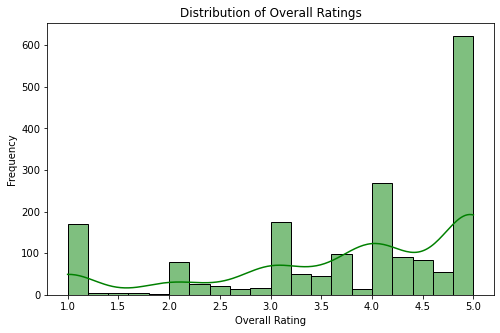

In [35]:
# Convert overall_rating to numeric, if not already
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce')

# Plot distribution of Overall Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['overall_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


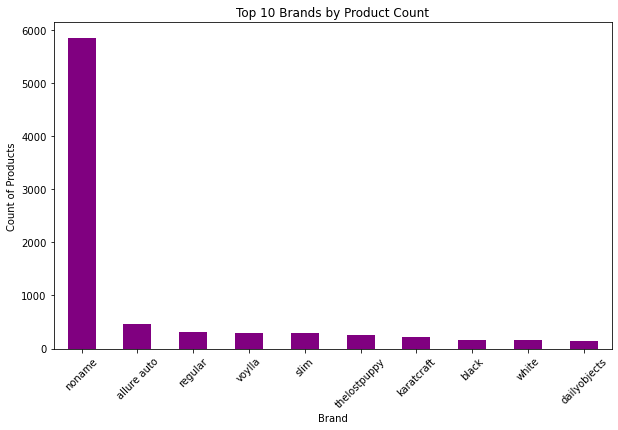

In [36]:
# Plot most common brands
plt.figure(figsize=(10, 6))

df['brand'].value_counts().nlargest(10).plot(kind='bar', color='purple')

plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

plt.show()

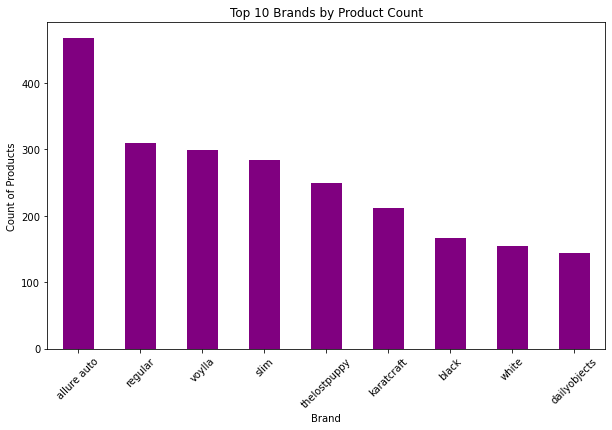

In [37]:
# Plot most common brands without noname
plt.figure(figsize=(10, 6))

df['brand'].value_counts().nlargest(10)[1:].plot(kind='bar', color='purple')

plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

plt.show()

In [73]:
df['retail_price'].describe()

count     19905.000000
mean       2980.045918
std        9013.265334
min          35.000000
25%         666.000000
50%        1040.000000
75%        1999.000000
max      571230.000000
Name: retail_price, dtype: float64

In [72]:
z_scores = stats.zscore(df['retail_price'].dropna())
df_for_qq = df[(abs(z_scores) < 3)]

Calculate Z-scores for 'retail_price'. Drop NaNs for accurate Z-score computation. Define a threshold for Z-score (commonly 3 standard deviations).

In [74]:
df_for_qq['retail_price'].describe()

count    19324.000000
mean      1755.804440
std       2752.922484
min         35.000000
25%        650.000000
50%        999.000000
75%       1899.000000
max      30000.000000
Name: retail_price, dtype: float64

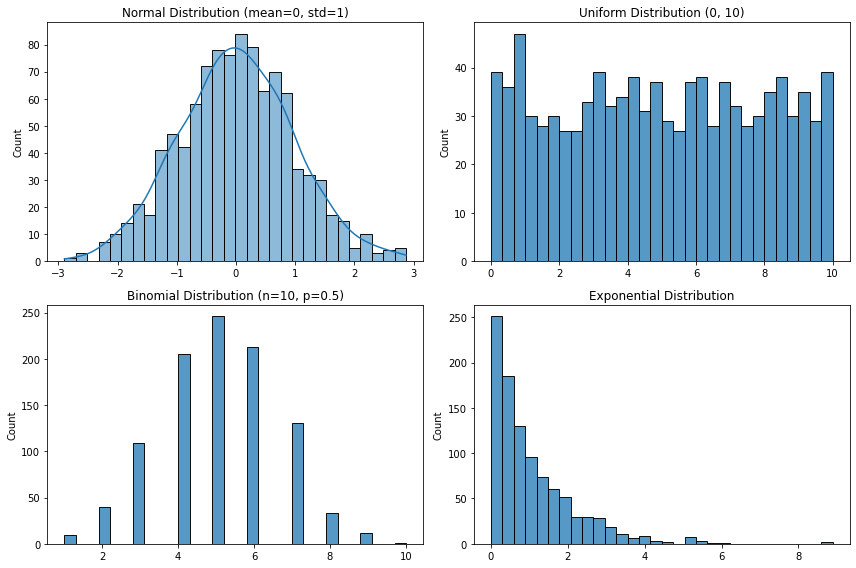

In [87]:
size                = 1000
normal_data         = np.random.normal(loc=0, scale=1, size=size)
uniform_data        = np.random.uniform(low=0, high=10, size=size)
binomial_data       = np.random.binomial(n=10, p=0.5, size=size)
exponential_data    = np.random.exponential(scale=1, size=size)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(normal_data, bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Normal Distribution (mean=0, std=1)')

sns.histplot(uniform_data, bins=30, kde=False, ax=axs[0, 1])
axs[0, 1].set_title('Uniform Distribution (0, 10)')

sns.histplot(binomial_data, bins=30, kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Binomial Distribution (n=10, p=0.5)')

sns.histplot(exponential_data, bins=30, kde=False, ax=axs[1, 1])
axs[1, 1].set_title('Exponential Distribution')

plt.tight_layout()
plt.show()

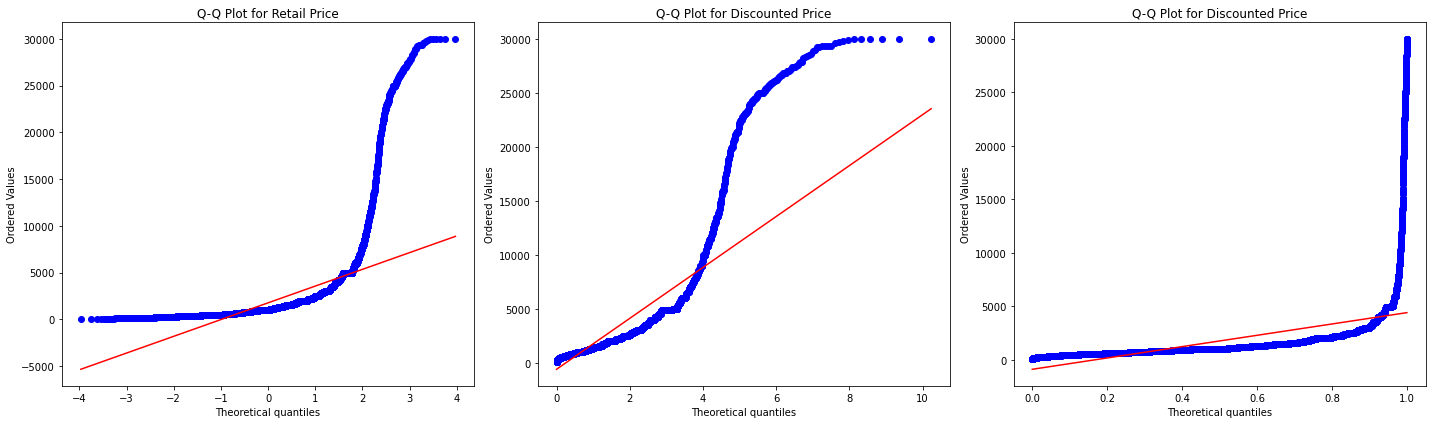

In [75]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
stats.probplot(df_for_qq['retail_price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Retail Price')

plt.subplot(1, 3, 2)
stats.probplot(df_for_qq['retail_price'], dist="expon", plot=plt)
plt.title('Q-Q Plot for Discounted Price')

plt.subplot(1, 3, 3)
stats.probplot(df_for_qq['retail_price'], dist="uniform", plot=plt)
plt.title('Q-Q Plot for Discounted Price')

plt.tight_layout()
plt.show()

None of the distribution options is suitable for the  retail_price column

In [93]:
data = df['retail_price']

def stem_and_leaf(data):
    data_sorted = np.sort(data)

    stems = data_sorted // 10
    leaves = data_sorted % 10

    stem_leaf_dict = {}
    for stem, leaf in zip(stems, leaves):
        stem_leaf_dict.setdefault(stem, []).append(int(leaf))
    
    print("Stem | Leaf\n" + "-------------")

    for stem, leaf_list in stem_leaf_dict.items():
        leaf_str = ' '.join(map(str, leaf_list))
        print(f"{int(stem):2d}  | {leaf_str}")
        
stem_and_leaf(data)

quantiles = data.quantile([0.25, 0.50, 0.75])

print("\nQuantiles:")
print(f"25th Percentile (Q1): {quantiles[0.25]:.2f}")
print(f"50th Percentile (Median, Q2): {quantiles[0.50]:.2f}")
print(f"75th Percentile (Q3): {quantiles[0.75]:.2f}")

Stem | Leaf
-------------
 3  | 5 6
 4  | 9
 5  | 5 9 9 9
 6  | 3 9 9
 7  | 0 8 9 9
 8  | 0 0 0 0 0 0 5 5
 9  | 9 9 9 9 9 9 9 9 9 9
10  | 0 0 0 0 2 2 2 2 2 9 9
11  | 0 0 0 5 5 5 5
12  | 0 0 0 0 0 0 5 5 9 9 9 9 9 9 9 9 9 9
13  | 0 9
14  | 0 2 5 5 9 9 9 9 9 9 9 9 9 9 9
15  | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 5 8 8 8
16  | 0 4 5 9 9 9 9 9 9 9 9 9 9
17  | 0 0 0 4 5 5 5 5 6 9 9 9 9 9 9 9 9 9
18  | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 5 5 9 9
19  | 0 0 0 0 0 0 0 0 0 1 5 5 5 5 7 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
20  | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 6 6 7 7
21  | 0 0 0 0 0 0 3 4 5 5 5 6 6
22  | 0 0 0 4 4 5 5 5 5 5 5 5 5 5 5
23  | 0 0 0 0 0 0 0 0 0 0 0 4 4 5 5 6 6 7 8 8 9 9 9 9 9 9 9 9 9 9
24  | 0 0 0 0 0 4 5 5 5 5 5 7 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
25  | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 5 5 5 5 5 7 9 9 9 9
26  | 0 0 